> https://www.datacamp.com/community/tutorials/kaggle-machine-learning-eda


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score

# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [2]:
# Import test and train datasets
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

# View first lines of training data
df_train.head(n=4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [3]:
# View first lines of test data
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


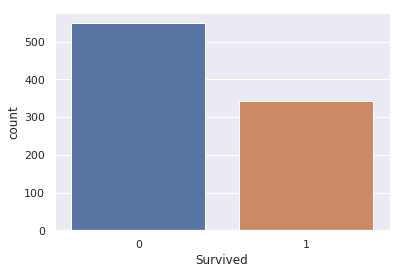

In [6]:
sns.countplot(x='Survived', data=df_train);

Take-away: in the training set, less people survived than didn't. Let's then build a first model that predicts that nobody survived.
This is a bad model as you know that people survived. But it gives us a baseline: any model that we build later needs to do better than this one.
You can do this by following these steps:
Create a column 'Survived' for df_test that encodes 'did not survive' for all rows;
Save 'PassengerId' and 'Survived' columns of df_test to a .csv 

In [10]:
df_test['Survived'] = 0
df_test[['PassengerId', 'Survived']].to_csv('data/predictions/no_survivors.csv', index=False)

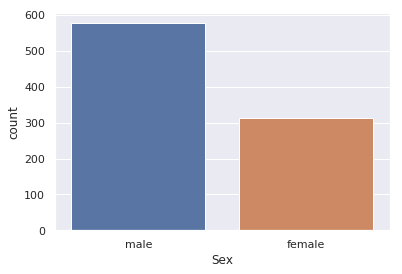

In [12]:
sns.countplot(x='Sex', data=df_train);

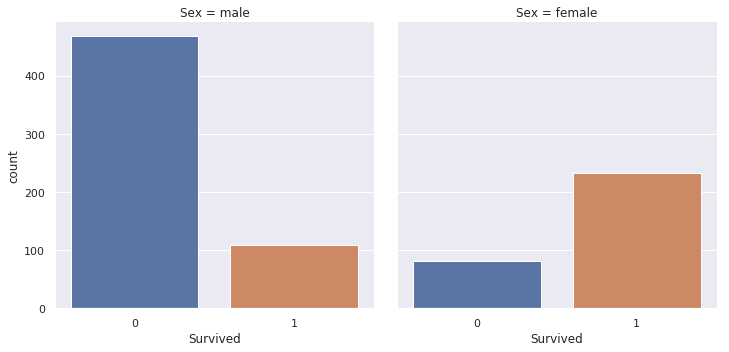

In [15]:
sns.catplot(x='Survived', col='Sex', kind='count', data=df_train);

In [18]:
df_train.groupby(['Sex']).Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [23]:
print("Proportion of Women Survived: ", df_train[df_train.Sex == 'female'].Survived.sum()/df_train[df_train.Sex == 'female'].Survived.count())
print("Proportion of Men Survived: ", df_train[df_train.Sex == 'male'].Survived.sum()/df_train[df_train.Sex == 'male'].Survived.count())

Proportion of Women Survived:  0.742038216561
Proportion of Men Survived:  0.188908145581


In [26]:
df_test['Survived'] = df_test.Sex == 'female'
df_test['Survived'] = df_test.Survived.apply(lambda x: int(x))
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [29]:
df_test[['PassengerId', 'Survived']].to_csv('data/predictions/women_survive.csv', index=False)

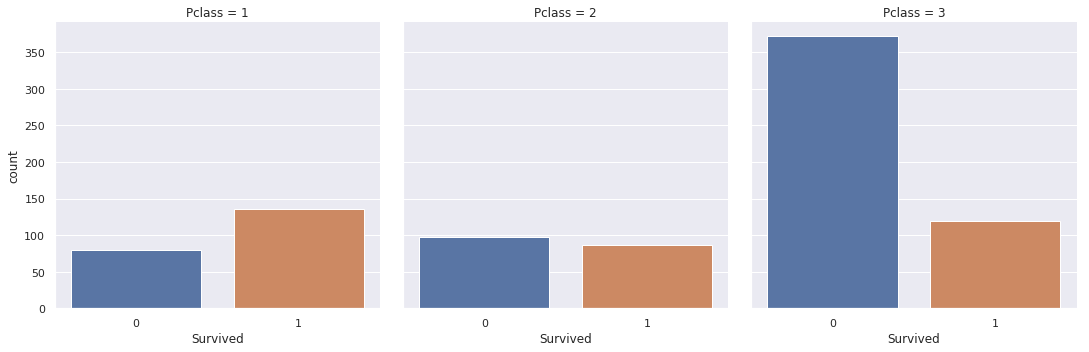

In [32]:
sns.catplot(x='Survived', col='Pclass', kind='count', data=df_train);

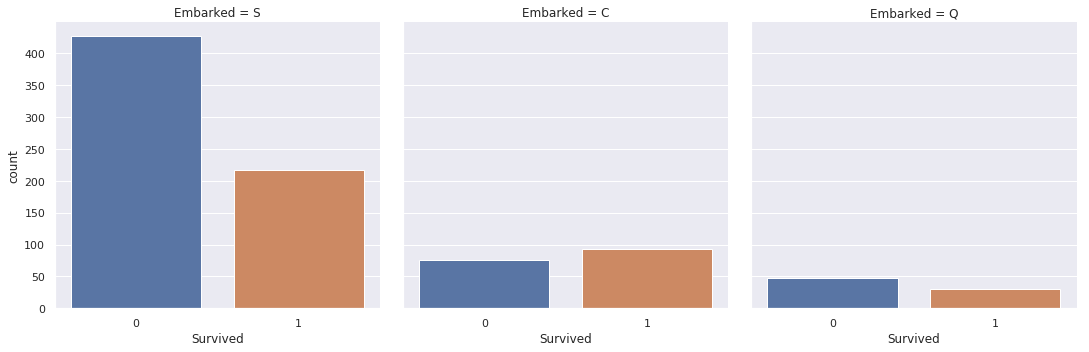

In [35]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=df_train);

Take-away: Passengers that embarked in Southampton were less likely to survive.

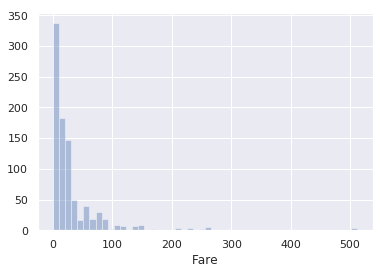

In [37]:
sns.distplot(df_train.Fare, kde=False);

Take-away: Most passengers paid less than 100 for travelling with the Titanic.

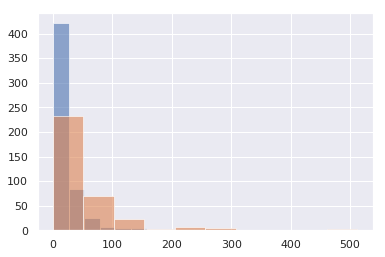

In [40]:
df_train.groupby('Survived').Fare.hist(alpha=0.6);

Take-away: It looks as though those that paid more had a higher chance of surviving.

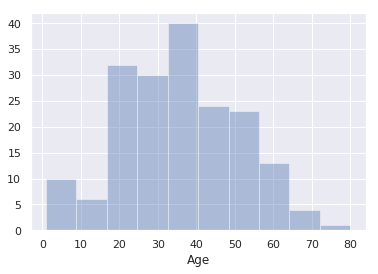

In [43]:
df_train_drop = df_train.dropna()
sns.distplot(df_train_drop.Age, kde=False);

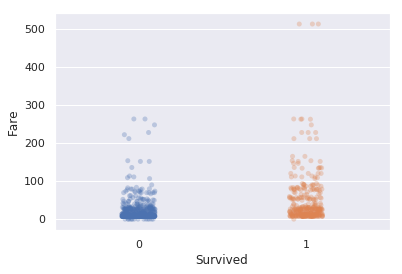

In [46]:
sns.stripplot(x='Survived', y='Fare', data=df_train, alpha=0.3, jitter=True);

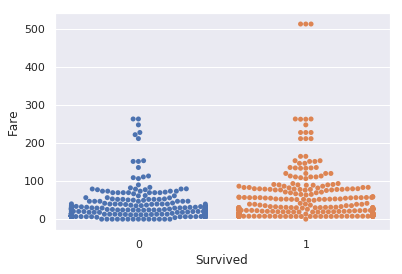

In [48]:
sns.swarmplot(x='Survived', y='Fare', data=df_train);

Take-away: Fare definitely seems to be correlated with survival aboard the Titanic.

use seaborn to plot a scatter plot of 'Age' against 'Fare', colored by 'Survived'.

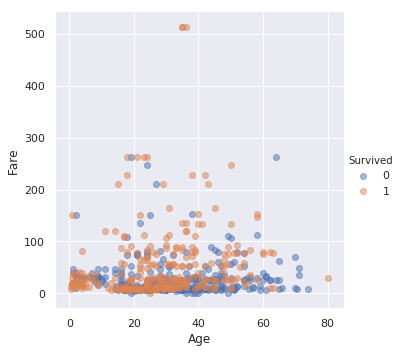

In [51]:
sns.lmplot(x='Age', y='Fare', hue='Survived', data=df_train, fit_reg=False, scatter_kws={'alpha':0.5});

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


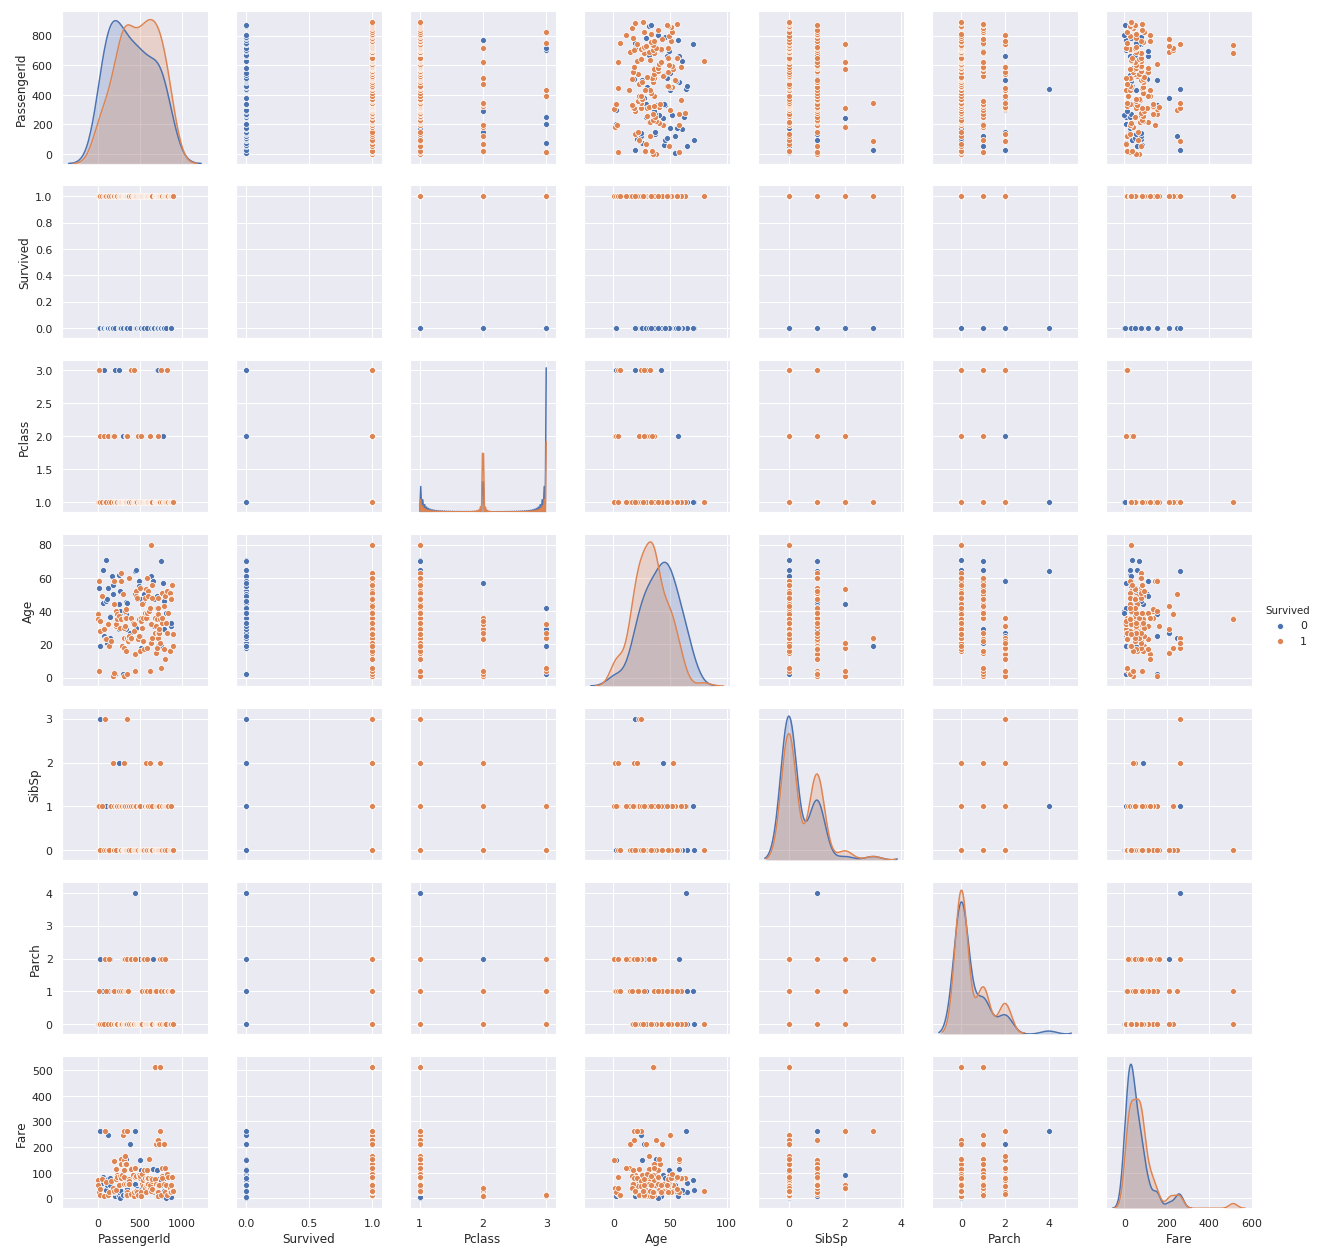

In [53]:
sns.pairplot(df_train_drop, hue='Survived');